In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [5]:
x_train_full.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train_full = x_train_full.reshape((60000,28,28,1))

In [8]:
x_test_full = x_test.reshape((10000,28,28,1))

In [9]:
x_train_n = x_train_full/255.
x_test_n = x_test/255.

In [27]:
x_valid,x_train = x_train_n[:5000],x_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [28]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [29]:
class_names[y_train_full[0]]

'Ankle boot'

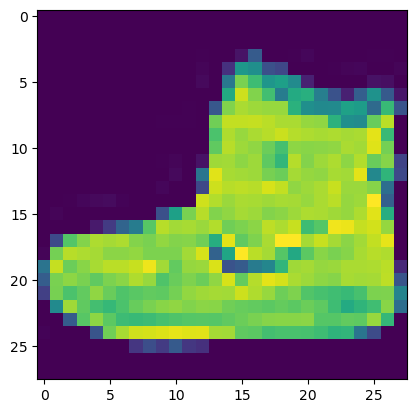

In [30]:
plt.imshow(x_train_full[0])

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = keras.models.Sequential()

In [22]:
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

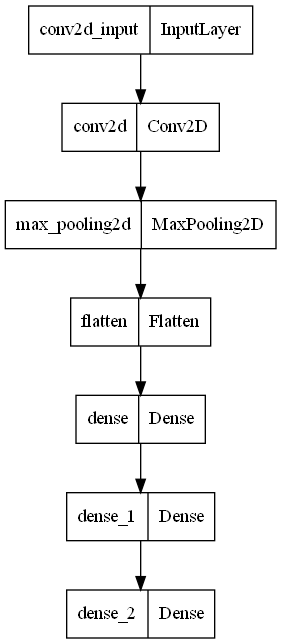

In [23]:
keras.utils.plot_model(model)

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

In [25]:
early_stopping_cb  = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

In [31]:
history = model.fit(x_train,y_train,epochs=50,batch_size=64,validation_data = (x_valid,y_valid),callbacks = early_stopping_cb)

Epoch 1/50
860/860 [==============================] - 61s 66ms/step - loss: 0.8344 - accuracy: 0.7129 - val_loss: 0.7738 - val_accuracy: 0.7168
Epoch 2/50
860/860 [==============================] - 53s 62ms/step - loss: 0.5402 - accuracy: 0.8047 - val_loss: 0.4968 - val_accuracy: 0.8098
Epoch 3/50
860/860 [==============================] - 58s 68ms/step - loss: 0.4853 - accuracy: 0.8245 - val_loss: 0.9098 - val_accuracy: 0.6996
Epoch 4/50
860/860 [==============================] - 63s 73ms/step - loss: 0.4491 - accuracy: 0.8398 - val_loss: 0.4123 - val_accuracy: 0.8608
Epoch 5/50
860/860 [==============================] - 67s 77ms/step - loss: 0.4258 - accuracy: 0.8478 - val_loss: 0.4351 - val_accuracy: 0.8470
Epoch 6/50
860/860 [==============================] - 67s 78ms/step - loss: 0.4016 - accuracy: 0.8575 - val_loss: 0.3794 - val_accuracy: 0.8690
Epoch 7/50
860/860 [==============================] - 71s 82ms/step - loss: 0.3836 - accuracy: 0.8633 - val_loss: 0.4123 - val_accuracy:

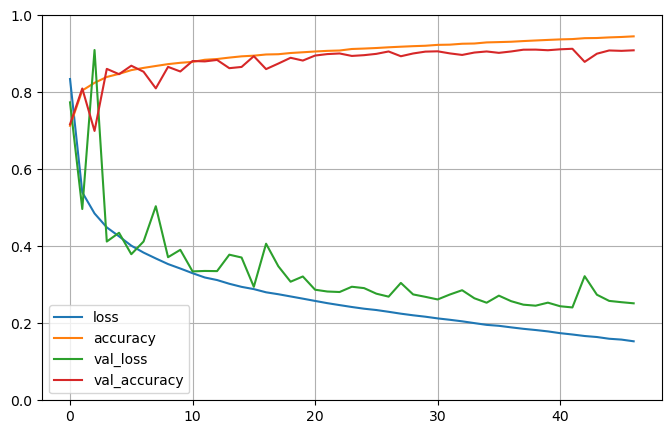

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 9s 26ms/step - loss: 62.8381 - accuracy: 0.8449


[62.83809280395508, 0.8449000120162964]

In [34]:
x_new = x_test[:4]

In [35]:
y_pred = np.argmax(model.predict(x_new),axis=-1)
y_pred

1/1 [==============================] - 2s 2s/step


array([9, 2, 1, 1], dtype=int64)

In [36]:
y_test[:4]

array([9, 2, 1, 1], dtype=uint8)

In [39]:
y_pred_c = np.array(class_names)[y_pred]
y_pred_c

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')

In [40]:
model.save("my_CNN_fashion_mnist.h5")
del model

In [41]:
keras.backend.clear_session()

# PROJECT

In [42]:
#classification of cats and dogs

In [43]:
train_dir = r"C:\Users\OWUSU\Desktop\ML n DL\Project\train"
validation_dir = r"C:\Users\OWUSU\Desktop\ML n DL\Project\validation"
test_dir = r"C:\Users\OWUSU\Desktop\ML n DL\Project\test"

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [73]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150, 150),batch_size = 20,class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [74]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [51]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [76]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [77]:
from tensorflow.keras import optimizers

In [78]:
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['accuracy'])

In [80]:
early_stopping = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [85]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50,callbacks=[early_stopping])

C:\Users\OWUSU\AppData\Local\Temp\ipykernel_11636\1659988724.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50,callbacks=[early_stopping])


Epoch 1/10
100/100 [==============================] - 254s 3s/step - loss: 0.3869 - accuracy: 0.8205 - val_loss: 0.5787 - val_accuracy: 0.7190
Epoch 2/10
100/100 [==============================] - 271s 3s/step - loss: 0.3622 - accuracy: 0.8275 - val_loss: 0.5841 - val_accuracy: 0.7110
Epoch 3/10
100/100 [==============================] - 313s 3s/step - loss: 0.3384 - accuracy: 0.8485 - val_loss: 0.5876 - val_accuracy: 0.7130
Epoch 4/10
100/100 [==============================] - 314s 3s/step - loss: 0.3071 - accuracy: 0.8720 - val_loss: 0.6048 - val_accuracy: 0.7110


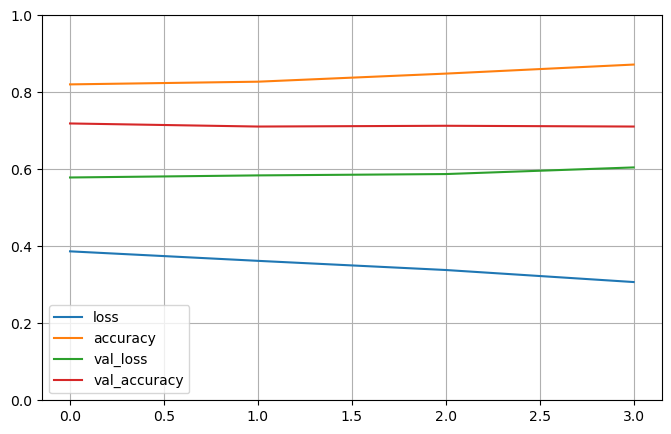

In [86]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [87]:
model.save("cnn_cat_dog_project.h5")
del model
keras.backend.clear_session

<function keras.backend.clear_session()>

In [88]:
    model = keras.models.load_model("cnn_cat_dog_project.h5")
    model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [90]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [91]:
model.evaluate(test_generator,steps=50)

50/50 [==============================] - 67s 1s/step - loss: 0.5739 - accuracy: 0.7100


[0.5738973617553711, 0.7099999785423279]

In [96]:
pred = model.predict(test_generator)

50/50 [==============================] - 24s 433ms/step


In [97]:
pred[:4]

array([[0.46455777],
       [0.7286841 ],
       [0.3133293 ],
       [0.8120074 ]], dtype=float32)

In [103]:
from PIL import Image

In [107]:
img = Image.fromarray(pred,mode='RGB')

In [111]:
img.show(0)

In [112]:
del model
keras.backend.clear_session()

# Data Augmentation

In [113]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [123]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 128)     

In [137]:
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['accuracy'])

early_stopping = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10,restore_best_weights=True),keras.callbacks.ModelCheckpoint('cnn_cat_dog_aug.h5',save_best_only=True)]

In [138]:
history = model.fit(train_generator,steps_per_epoch=100,validation_data=validation_generator,validation_steps=50,epochs=400,callbacks=[early_stopping])

Epoch 1/400
100/100 [==============================] - 191s 2s/step - loss: 0.5613 - accuracy: 0.7105 - val_loss: 0.5332 - val_accuracy: 0.7160
Epoch 2/400
100/100 [==============================] - 222s 2s/step - loss: 0.5516 - accuracy: 0.7210 - val_loss: 0.5401 - val_accuracy: 0.7120
Epoch 3/400
100/100 [==============================] - 238s 2s/step - loss: 0.5502 - accuracy: 0.7080 - val_loss: 0.5883 - val_accuracy: 0.6850
Epoch 4/400
100/100 [==============================] - 240s 2s/step - loss: 0.5477 - accuracy: 0.7235 - val_loss: 0.5242 - val_accuracy: 0.7140
Epoch 5/400
100/100 [==============================] - 237s 2s/step - loss: 0.5503 - accuracy: 0.7245 - val_loss: 0.4959 - val_accuracy: 0.7490
Epoch 6/400
100/100 [==============================] - 240s 2s/step - loss: 0.5342 - accuracy: 0.7320 - val_loss: 0.5007 - val_accuracy: 0.7420
Epoch 7/400
100/100 [==============================] - 243s 2s/step - loss: 0.5437 - accuracy: 0.7360 - val_loss: 0.4922 - val_accuracy:

In [139]:
model.evaluate(test_generator,steps=50)

50/50 [==============================] - 36s 707ms/step - loss: 0.4669 - accuracy: 0.7760


[0.46686089038848877, 0.7760000228881836]

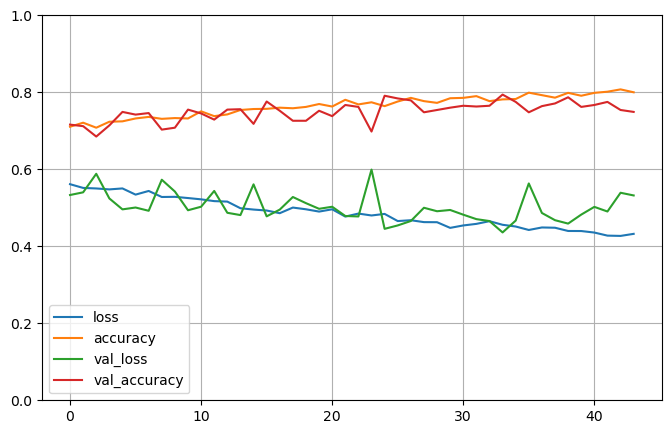

In [141]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# VGG

In [145]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150,150,3)
                 )
conv_base.summary()
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.summary()


58889256/58889256 [==============================] - 206s 3us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                            

In [146]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=2e-5),
             metrics = ['accuracy'])

callbacks = keras.callbacks.ModelCheckpoint("cat_dog_vgg.h5",save_best_only = True)

In [148]:
history = model.fit(train_generator,steps_per_epoch = 100,validation_data = validation_generator,validation_steps=50,epochs=100,callbacks=callbacks)

Epoch 1/100
100/100 [==============================] - 4616s 46s/step - loss: 0.4604 - accuracy: 0.7780 - val_loss: 0.1853 - val_accuracy: 0.9170
Epoch 2/100
 32/100 [========>.....................] - ETA: 48:31 - loss: 0.3079 - accuracy: 0.8766

KeyboardInterrupt: 